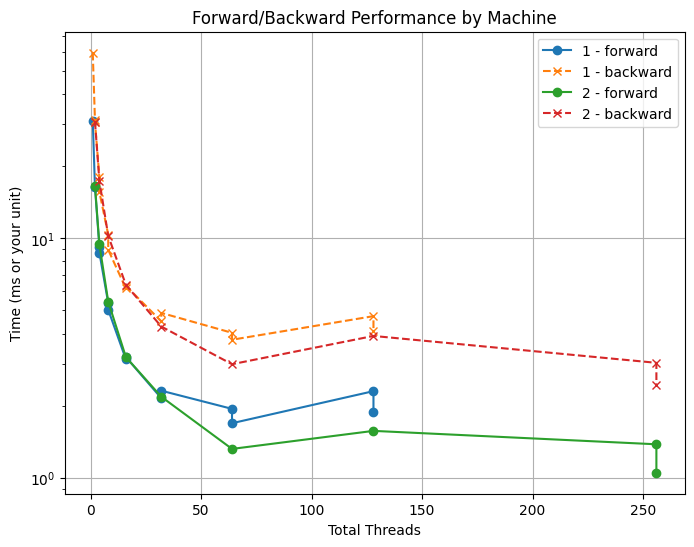

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read your CSV (make sure you have columns: Machine, Process, TotalThreads, forward, backward)
df = pd.read_csv("speed.csv")

# 2. Convert TotalThreads to numeric if needed
df['TotalThreads'] = pd.to_numeric(df['TotalThreads'], errors='coerce')

# 3. Create a figure
plt.figure(figsize=(8, 6))

# 4. Plot lines for each machine
machines = df['Machine'].unique()
for m in machines:
    sub_df = df[df['Machine'] == m]
    # Sort by threads so lines go in ascending order
    sub_df = sub_df.sort_values('TotalThreads')
    
    plt.plot(sub_df['TotalThreads'], sub_df['forward'], 
             marker='o', linestyle='-', label=f'{m} - forward')
    plt.plot(sub_df['TotalThreads'], sub_df['backward'], 
             marker='x', linestyle='--', label=f'{m} - backward')

# 5. Labeling
plt.xlabel("Total Threads")
plt.ylabel("Time cost")
plt.title("Forward/Backward Performance on vit_b_16")
plt.legend()
plt.grid(True)

# 6. Set y-axis to log scale
plt.yscale("log")

# 7. Show plot
plt.show()


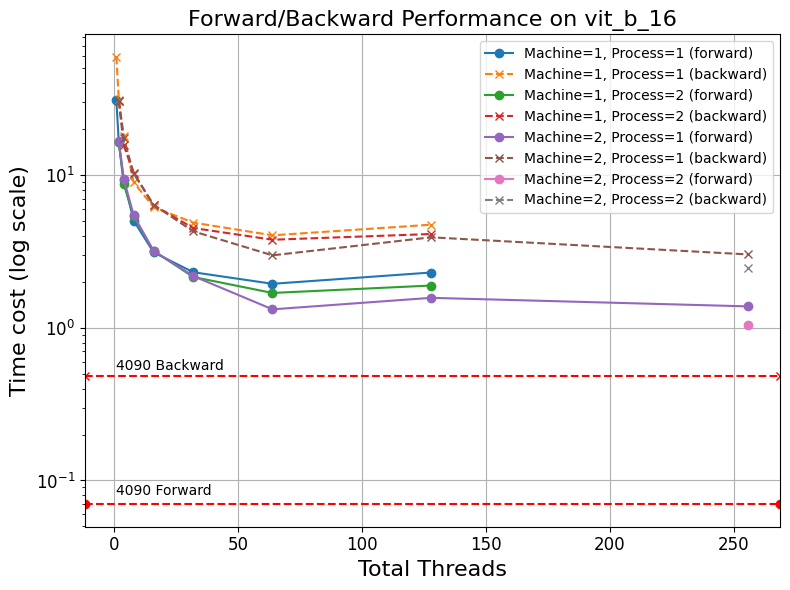

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read the CSV
df = pd.read_csv("speed.csv")

# 2. Convert to numeric if needed
df["TotalThreads"] = pd.to_numeric(df["TotalThreads"], errors="coerce")
df["Machine"]      = pd.to_numeric(df["Machine"], errors="coerce")
df["Process"]      = pd.to_numeric(df["Process"], errors="coerce")

# 3. Filter and plot each combination
combinations = [
    (1, 1),
    (1, 2),
    (2, 1),
    (2, 2),
]

plt.figure(figsize=(8, 6))

for (mach, proc) in combinations:
    # Filter rows for this Machine/Process combination
    sub_df = df[(df["Machine"] == mach) & (df["Process"] == proc)]
    # Sort by threads for a clean line
    sub_df = sub_df.sort_values("TotalThreads")
    
    # Plot forward
    plt.plot(
        sub_df["TotalThreads"], 
        sub_df["forward"], 
        marker="o", linestyle="-", 
        label=f"Machine={mach}, Process={proc} (forward)"
    )
    # Plot backward
    plt.plot(
        sub_df["TotalThreads"], 
        sub_df["backward"], 
        marker="x", linestyle="--", 
        label=f"Machine={mach}, Process={proc} (backward)"
    )

# 4. Set log scale on y-axis
plt.axhline(y=0.0698, color='red', linestyle='--', marker="o", )
plt.text(1, 0.0698+0.01, "4090 Forward", color='black')
plt.axhline(y=0.481, color='red', linestyle='--', marker="x", )
plt.text(1, 0.481+0.05, "4090 Backward", color='black')
plt.yscale("log")

# 5. Labels, legend, and grid
plt.xlabel("Total Threads", fontsize=16)
plt.ylabel("Time cost (log scale)", fontsize=16)
plt.title("Forward/Backward Performance on vit_b_16", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
